In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
#step1:upload csv file
!gdown --id 1OCKyUHYu6lee6aQAsYAEs2raxZPW58Wu
df = pd.read_csv('train.csv')

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OCKyUHYu6lee6aQAsYAEs2raxZPW58Wu
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 188MB/s]


In [38]:
df = pd.read_excel("SuperMarket Analysis (1).xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SuperMarket Analysis (1).xlsx'

In [36]:
import pandas as pd
import os

file_path_csv = 'SuperMarket Analysis.csv'

if os.path.exists(file_path_csv):
    print(f"File '{file_path_csv}' found. Attempting to load as CSV...")
    df = pd.read_csv(file_path_csv)
    print("\nFirst 5 rows of the DataFrame loaded from CSV:")
    display(df.head())
else:
    print(f"Error: The file '{file_path_csv}' was not found either. Please ensure the correct file is uploaded.")

File 'SuperMarket Analysis.csv' found. Attempting to load as CSV...

First 5 rows of the DataFrame loaded from CSV:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [29]:
import os
import pandas as pd

file_path = 'SuperMarket Analysis (1).xlsx'

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded to the Colab environment or the path is correct.")
else:
    print(f"File '{file_path}' found. Loading data...")
    df = pd.read_excel(file_path)

    print("\nFirst 5 rows of the DataFrame:")
    display(df.head())

    print("\nDataFrame Info:")
    df.info()

    print("\nDescriptive Statistics:")
    display(df.describe())

    print("\nMissing Values per column (before cleaning column names):")
    print(df.isnull().sum())

    df.columns = df.columns.str.strip()
    print("\nColumn names cleaned.")

    print("\nMissing Values per column (after cleaning column names and re-checking):")
    print(df.isnull().sum())

Error: The file 'SuperMarket Analysis (1).xlsx' was not found. Please ensure it is uploaded to the Colab environment or the path is correct.


In [24]:
# عرض أبعاد (عدد الصفوف والأعمدة) DataFrame
df.shape

(42000, 785)

In [25]:
# تنظيف أسماء الأعمدة بإزالة المسافات البيضاء الزائدة من البداية والنهاية
df.columns = df.columns.str.strip()

In [26]:
#step3: cleaning dataset
#missing value
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [40]:
# طباعة أسماء جميع الأعمدة في DataFrame
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [23]:
# اختيار الأعمدة الرقمية فقط
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"عدد القيم الشاذة في {col}:", outliers.shape[0])

عدد القيم الشاذة في label: 0
عدد القيم الشاذة في pixel0: 0
عدد القيم الشاذة في pixel1: 0
عدد القيم الشاذة في pixel2: 0
عدد القيم الشاذة في pixel3: 0
عدد القيم الشاذة في pixel4: 0
عدد القيم الشاذة في pixel5: 0
عدد القيم الشاذة في pixel6: 0
عدد القيم الشاذة في pixel7: 0
عدد القيم الشاذة في pixel8: 0
عدد القيم الشاذة في pixel9: 0
عدد القيم الشاذة في pixel10: 0
عدد القيم الشاذة في pixel11: 0
عدد القيم الشاذة في pixel12: 2
عدد القيم الشاذة في pixel13: 2
عدد القيم الشاذة في pixel14: 1
عدد القيم الشاذة في pixel15: 1
عدد القيم الشاذة في pixel16: 0
عدد القيم الشاذة في pixel17: 0
عدد القيم الشاذة في pixel18: 0
عدد القيم الشاذة في pixel19: 0
عدد القيم الشاذة في pixel20: 0
عدد القيم الشاذة في pixel21: 0
عدد القيم الشاذة في pixel22: 0
عدد القيم الشاذة في pixel23: 0
عدد القيم الشاذة في pixel24: 0
عدد القيم الشاذة في pixel25: 0
عدد القيم الشاذة في pixel26: 0
عدد القيم الشاذة في pixel27: 0
عدد القيم الشاذة في pixel28: 0
عدد القيم الشاذة في pixel29: 0
عدد القيم الشاذة في pixel30: 0
عدد القيم الشاذة في 

In [41]:
#حذف اعمدةة غير ضرورية
df = df.drop(['Invoice ID'], axis=1, errors='ignore')

In [22]:

# بعد الاستخراج نحذف العمود الأصلي
df.columns = df.columns.str.strip()

In [44]:
#استخراج الساعة من الوقت
df.columns = df.columns.str.strip()

# Specify the format to avoid UserWarning and ensure consistent parsing
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce')
df['Hour'] = df['Time'].dt.hour

In [20]:
#حذف عمود الوقت
df = df.drop(['Time'], axis=1, errors='ignore')


In [46]:
# إعادة تطبيق خطوات معالجة البيانات لضمان وجود عمود 'Hour' وسلامة البيانات

# حذف عمود 'Invoice ID' إذا كان موجودًا
if 'Invoice ID' in df.columns:
    df = df.drop(['Invoice ID'], axis=1)
    print("عمود 'Invoice ID' تم حذفه.")

# تنظيف أسماء الأعمدة (إذا لم يتم القيام بذلك مسبقًا بشكل صحيح)
df.columns = df.columns.str.strip()

# استخراج الساعة من عمود 'Time'
# تأكد من أن عمود 'Time' موجود أولاً
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce')
    df['Hour'] = df['Time'].dt.hour
    print("تم استخراج عمود 'Hour' من 'Time'.")
    # حذف عمود 'Time' بعد استخراج الساعة منه
    df = df.drop(['Time'], axis=1)
    print("عمود 'Time' تم حذفه.")
else:
    print("عمود 'Time' غير موجود، لا يمكن استخراج الساعة.")

# التأكد من تحويل الوقت وعمود 'Hour'
if 'Hour' in df.columns:
    print(f"عدد القيم المفقودة في عمود 'Hour': {df['Hour'].isnull().sum()}")
else:
    print("عمود 'Hour' غير موجود بعد المعالجة.")

print("\nأول 5 صفوف من DataFrame بعد المعالجة:")
display(df.head())

عمود 'Time' غير موجود، لا يمكن استخراج الساعة.
عدد القيم المفقودة في عمود 'Hour': 0

أول 5 صفوف من DataFrame بعد المعالجة:


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1,13
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6,10
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4,13
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4,20
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3,10


In [52]:
#encoding للاعمدة النصية
df_encoded = pd.get_dummies(df, drop_first=True)

In [64]:
#تقسيم البيانات

from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
y = df_encoded['Sales']
# Drop columns that are direct calculations or highly correlated with 'Sales' to avoid data leakage
X = df_encoded.drop(['Sales', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (800, 105)
Shape of X_test: (200, 105)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [58]:
# تدريب النموذج
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression() # نؤسس النموذج هنا
model.fit(X_train_scaled, y_train)

# التنبؤ من نفس X_test
y_pred = model.predict(X_test_scaled)

# تأكدي من الأحجام
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

Length of y_test: 200
Length of y_pred: 200


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 3.5191405345358364e-13
MSE: 1.925877682352265e-25
RMSE: 4.388482291581299e-13
R2 Score: 1.0


In [68]:
import os

file_path = 'SuperMarket Analysis (1).xlsx'

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded to the Colab environment or the path is correct.")
else:
    df = pd.read_excel(file_path)

    print("First 5 rows of the DataFrame:")
    print(df.head())

    print("\nDataFrame Info:")
    df.info()

    print("\nDescriptive Statistics:")
    print(df.describe())

    print("\nMissing Values per column (before cleaning column names):")
    print(df.isnull().sum())

    df.columns = df.columns.str.strip()
    print("\nColumn names cleaned.")

    print("\nMissing Values per column (after cleaning column names and re-checking):")
    print(df.isnull().sum())

Error: The file 'SuperMarket Analysis (1).xlsx' was not found. Please ensure it is uploaded to the Colab environment or the path is correct.


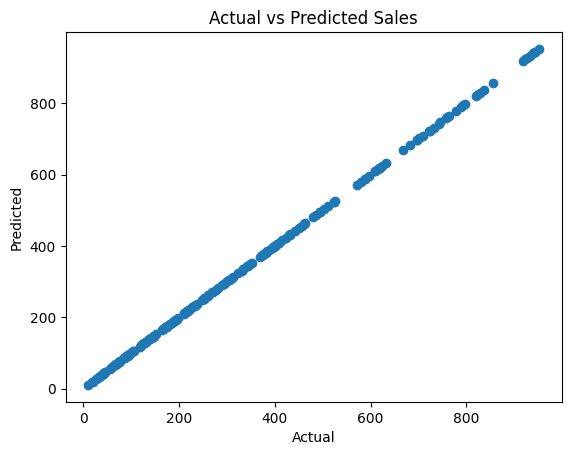

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Sales")
plt.show()

In [80]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)